# Assignment 4
<br>*Last edit: 2/26/2021*

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# Neural Net
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# other things
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Prepare the data

In [2]:
# 
path = os.getcwd() + '\\specific_data_categorized.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
target = data['target']
# Remove features that don't contribute to the classification of the tracks
del data['target']
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

del data['time_signature']

'''target=target.replace(to_replace="jazz",value="0")
target=target.replace(to_replace="blues",value="1")
target=target.replace(to_replace="soul",value="2")'''

'''target=target.replace(to_replace="indie",value="0")
target=target.replace(to_replace="rock",value="1")
target=target.replace(to_replace="pop",value="2")
target=target.replace(to_replace="hiphop",value="3")
target=target.replace(to_replace="country",value="4")
target=target.replace(to_replace="randb",value="5")
target=target.replace(to_replace="latin",value="6")
target=target.replace(to_replace="dance",value="7")
target=target.replace(to_replace="folk",value="8")
target=target.replace(to_replace="jazz",value="9")
target=target.replace(to_replace="classical",value="10")
target=target.replace(to_replace="soul",value="11")
target=target.replace(to_replace="punk",value="12")
target=target.replace(to_replace="metal",value="13")
target=target.replace(to_replace="reggae",value="14")'''

data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.639,0.269,8,-11.435,1,0.0698,0.982,0.120000,0.141,0.5390,124.866,207827
1,0.421,0.080,7,-21.795,1,0.0400,0.903,0.859000,0.135,0.0546,122.044,257693
2,0.626,0.152,5,-14.182,0,0.0405,0.934,0.000061,0.120,0.5450,82.174,184467
3,0.515,0.583,0,-8.182,0,0.0284,0.749,0.000294,0.123,0.4140,116.110,333947
4,0.468,0.391,2,-13.196,0,0.0269,0.658,0.061700,0.111,0.3420,142.413,550493


In [3]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((882, 12), (295, 12), (882,), (295,))

In [4]:
# Test many models
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [6]:
for model in classifiers:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_df = pd.DataFrame(conf_matrix)
    display(conf_df)
    print(classification_report(y_test, y_pred))

,0,1,2
0,40,19,17
1,28,68,19
2,48,21,35


              precision    recall  f1-score   support

       blues       0.34      0.53      0.42        76
        jazz       0.63      0.59      0.61       115
        soul       0.49      0.34      0.40       104

    accuracy                           0.48       295
   macro avg       0.49      0.48      0.48       295
weighted avg       0.51      0.48      0.49       295



,0,1,2
0,0,76,0
1,0,115,0
2,0,104,0


              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        76
        jazz       0.39      1.00      0.56       115
        soul       0.00      0.00      0.00       104

    accuracy                           0.39       295
   macro avg       0.13      0.33      0.19       295
weighted avg       0.15      0.39      0.22       295



C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2
0,51,8,17
1,12,99,4
2,32,2,70


              precision    recall  f1-score   support

       blues       0.54      0.67      0.60        76
        jazz       0.91      0.86      0.88       115
        soul       0.77      0.67      0.72       104

    accuracy                           0.75       295
   macro avg       0.74      0.73      0.73       295
weighted avg       0.76      0.75      0.75       295



,0,1,2
0,40,11,25
1,8,105,2
2,18,7,79


              precision    recall  f1-score   support

       blues       0.61      0.53      0.56        76
        jazz       0.85      0.91      0.88       115
        soul       0.75      0.76      0.75       104

    accuracy                           0.76       295
   macro avg       0.74      0.73      0.73       295
weighted avg       0.75      0.76      0.75       295



,0,1,2
0,76,0,0
1,115,0,0
2,104,0,0


C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       blues       0.26      1.00      0.41        76
        jazz       0.00      0.00      0.00       115
        soul       0.00      0.00      0.00       104

    accuracy                           0.26       295
   macro avg       0.09      0.33      0.14       295
weighted avg       0.07      0.26      0.11       295



,0,1,2
0,47,9,20
1,8,104,3
2,16,3,85


              precision    recall  f1-score   support

       blues       0.66      0.62      0.64        76
        jazz       0.90      0.90      0.90       115
        soul       0.79      0.82      0.80       104

    accuracy                           0.80       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.80      0.80      0.80       295



,0,1,2
0,16,36,24
1,5,81,29
2,3,22,79


              precision    recall  f1-score   support

       blues       0.67      0.21      0.32        76
        jazz       0.58      0.70      0.64       115
        soul       0.60      0.76      0.67       104

    accuracy                           0.60       295
   macro avg       0.62      0.56      0.54       295
weighted avg       0.61      0.60      0.57       295



,0,1,2
0,41,8,27
1,6,104,5
2,17,9,78


              precision    recall  f1-score   support

       blues       0.64      0.54      0.59        76
        jazz       0.86      0.90      0.88       115
        soul       0.71      0.75      0.73       104

    accuracy                           0.76       295
   macro avg       0.74      0.73      0.73       295
weighted avg       0.75      0.76      0.75       295



              precision    recall  f1-score   support

       blues       0.70      0.67      0.68        76
        jazz       0.94      0.90      0.92       115
        soul       0.79      0.85      0.81       104

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295



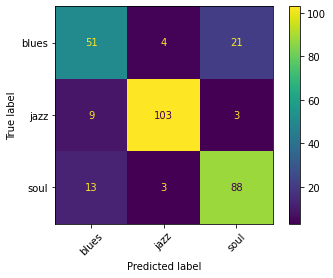

In [7]:
# Random Forest Classifier No Regularization
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

       blues       0.64      0.54      0.59        76
        jazz       0.86      0.90      0.88       115
        soul       0.71      0.75      0.73       104

    accuracy                           0.76       295
   macro avg       0.74      0.73      0.73       295
weighted avg       0.75      0.76      0.75       295



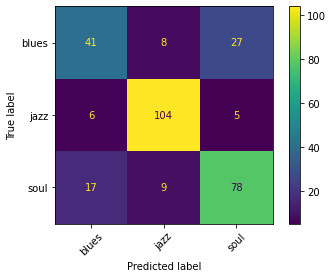

In [8]:
# Quad Discriminant No Regularization
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        76
        jazz       0.39      1.00      0.56       115
        soul       0.00      0.00      0.00       104

    accuracy                           0.39       295
   macro avg       0.13      0.33      0.19       295
weighted avg       0.15      0.39      0.22       295



C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


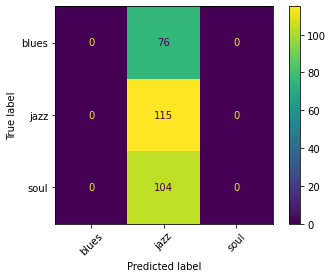

In [9]:
# SVC No Regularization
model = SVC(gamma=2, C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

In [10]:
# MLP
# Reload dataset
path = os.getcwd() + '\\specific_data_categorized.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
target = data['target']
# Remove features that don't contribute to the classification of the tracks
del data['target']
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

del data['time_signature']

target=target.replace(to_replace="jazz",value="0")
target=target.replace(to_replace="blues",value="1")
target=target.replace(to_replace="soul",value="2")
# Convert labels to numbers
'''target=target.replace(to_replace="indie",value="0")
target=target.replace(to_replace="rock",value="1")
target=target.replace(to_replace="pop",value="2")
target=target.replace(to_replace="hiphop",value="3")
target=target.replace(to_replace="country",value="4")
target=target.replace(to_replace="randb",value="5")
target=target.replace(to_replace="latin",value="6")
target=target.replace(to_replace="dance",value="7")
target=target.replace(to_replace="folk",value="8")
target=target.replace(to_replace="jazz",value="9")
target=target.replace(to_replace="classical",value="10")
target=target.replace(to_replace="soul",value="11")
target=target.replace(to_replace="punk",value="12")
target=target.replace(to_replace="metal",value="13")
target=target.replace(to_replace="reggae",value="14")'''

'target=target.replace(to_replace="indie",value="0")\ntarget=target.replace(to_replace="rock",value="1")\ntarget=target.replace(to_replace="pop",value="2")\ntarget=target.replace(to_replace="hiphop",value="3")\ntarget=target.replace(to_replace="country",value="4")\ntarget=target.replace(to_replace="randb",value="5")\ntarget=target.replace(to_replace="latin",value="6")\ntarget=target.replace(to_replace="dance",value="7")\ntarget=target.replace(to_replace="folk",value="8")\ntarget=target.replace(to_replace="jazz",value="9")\ntarget=target.replace(to_replace="classical",value="10")\ntarget=target.replace(to_replace="soul",value="11")\ntarget=target.replace(to_replace="punk",value="12")\ntarget=target.replace(to_replace="metal",value="13")\ntarget=target.replace(to_replace="reggae",value="14")'

In [11]:
# Regularize data
x = data.values
min_max_scalar = preprocessing.MinMaxScaler()
x_scaled = min_max_scalar.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)
print(data)

      danceability    energy       key  loudness  mode  speechiness  \
0         0.622279  0.270826  0.727273  0.679621   1.0     0.082216   
1         0.343150  0.075898  0.636364  0.321106   1.0     0.029640   
2         0.605634  0.150156  0.454545  0.584559   0.0     0.030522   
3         0.463508  0.594674  0.000000  0.792193   0.0     0.009174   
4         0.403329  0.396652  0.181818  0.618680   0.0     0.006528   
...            ...       ...       ...       ...   ...          ...   
1172      0.839949  0.525573  0.181818  0.709624   1.0     0.011115   
1173      1.000000  0.659650  1.000000  0.877150   0.0     0.361327   
1174      0.411012  0.687497  0.545455  0.614839   1.0     0.074806   
1175      0.983355  0.316206  0.090909  0.641278   0.0     0.023994   
1176      0.856594  0.359523  0.272727  0.644704   1.0     0.058574   

      acousticness  instrumentalness  liveness   valence     tempo  \
0         0.990917          0.121581  0.127538  0.524109  0.461654   
1      

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       115
           1       0.70      0.68      0.69        76
           2       0.78      0.83      0.80       104

    accuracy                           0.82       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



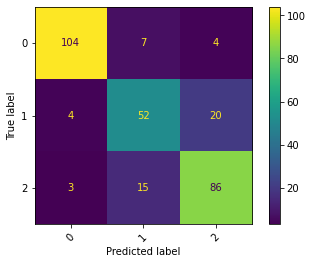

In [12]:
# Random Forest Classifier Post-Regularization
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       115
           1       0.64      0.54      0.59        76
           2       0.71      0.75      0.73       104

    accuracy                           0.76       295
   macro avg       0.74      0.73      0.73       295
weighted avg       0.75      0.76      0.75       295



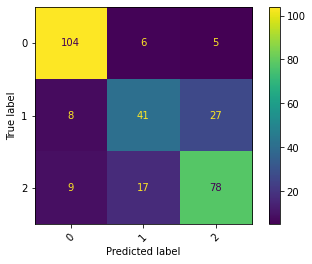

In [13]:
# Quad Discriminant Post-Regularization
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       115
           1       0.70      0.59      0.64        76
           2       0.74      0.86      0.79       104

    accuracy                           0.80       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.80      0.80      0.79       295



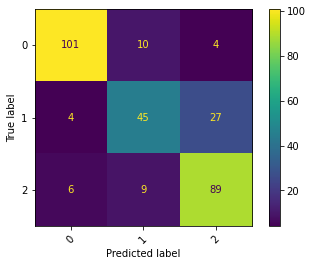

In [14]:
# SVC Post-Regularization
model = SVC(gamma=2, C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

In [15]:
# Onehot after split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

y_train_1hot = []
for data in y_train:
    hot = np.zeros(3)
    hot[int(data)] = 1
    y_train_1hot.append(hot)
        
y_test_1hot = []
for data in y_test:
    hot = np.zeros(3)
    hot[int(data)] = 1
    y_test_1hot.append(hot)
    
y_train_1hot = np.asarray(y_train_1hot)
y_test_1hot = np.asarray(y_test_1hot)

In [16]:
print(x_train.shape)
print(y_train_1hot.shape)

(882, 12)
(882, 3)


In [17]:
# 1 hidden layer, Adam
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizers.Adam(learning_rate=0.001, beta_1=0.95),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train_1hot, batch_size=32, epochs=50, validation_data=(x_test, y_test_1hot))

Epoch 1/50
28/28 [==============================] - 2s 32ms/step - loss: 1.0079 - accuracy: 0.5708 - val_loss: 0.8525 - val_accuracy: 0.6576
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 0.7962 - accuracy: 0.6882 - val_loss: 0.7120 - val_accuracy: 0.7525
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.7793 - val_loss: 0.6307 - val_accuracy: 0.7729
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 0.5808 - accuracy: 0.7661 - val_loss: 0.5862 - val_accuracy: 0.7729
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 0.5333 - accuracy: 0.7818 - val_loss: 0.5670 - val_accuracy: 0.7797
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.7769 - val_loss: 0.5487 - val_accuracy: 0.7966
Epoch 7/50
28/28 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7830 - val_loss: 0.5475 - val_accuracy: 0.7661
Epoch 8/50
28/28 [=

In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

10/10 - 0s - loss: 0.4607 - accuracy: 0.8169
Test accuracy: 0.8169491291046143


10/10 - 0s - loss: 0.4607 - accuracy: 0.8169
0.8169491291046143


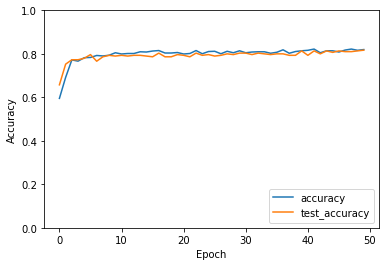

In [20]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [79]:
# 2 hidden layers, Adam
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizers.Adam(learning_rate=0.00025, beta_1=0.95),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
history = model.fit(x_train, y_train_1hot, batch_size=8, epochs=50, validation_data=(x_test, y_test_1hot))

Epoch 1/50
111/111 [==============================] - 1s 6ms/step - loss: 0.9512 - accuracy: 0.5648 - val_loss: 0.6334 - val_accuracy: 0.7424
Epoch 2/50
111/111 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7751 - val_loss: 0.5501 - val_accuracy: 0.7898
Epoch 3/50
111/111 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7586 - val_loss: 0.5338 - val_accuracy: 0.7898
Epoch 4/50
111/111 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.8144 - val_loss: 0.5203 - val_accuracy: 0.7627
Epoch 5/50
111/111 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.8122 - val_loss: 0.4971 - val_accuracy: 0.7898
Epoch 6/50
111/111 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.8037 - val_loss: 0.4944 - val_accuracy: 0.7864
Epoch 7/50
111/111 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.7864 - val_loss: 0.4981 - val_accuracy: 0.7831
Epoch 

In [81]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

10/10 - 0s - loss: 0.4865 - accuracy: 0.8068
Test accuracy: 0.806779682636261


10/10 - 0s - loss: 0.4865 - accuracy: 0.8068
0.806779682636261


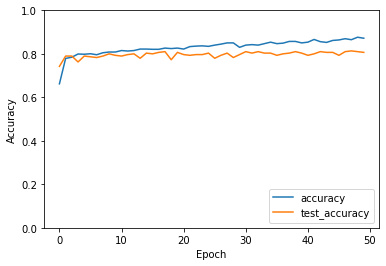

In [82]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [25]:
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizers.SGD(learning_rate=0.15),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train_1hot, batch_size=16, epochs=50, validation_data=(x_test, y_test_1hot))

Epoch 1/50
56/56 [==============================] - 1s 6ms/step - loss: 0.8817 - accuracy: 0.5400 - val_loss: 0.7472 - val_accuracy: 0.5627
Epoch 2/50
56/56 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.7394 - val_loss: 1.3245 - val_accuracy: 0.4576
Epoch 3/50
56/56 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7536 - val_loss: 0.5623 - val_accuracy: 0.7356
Epoch 4/50
56/56 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.7921 - val_loss: 1.3622 - val_accuracy: 0.4814
Epoch 5/50
56/56 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.7496 - val_loss: 0.7903 - val_accuracy: 0.6949
Epoch 6/50
56/56 [==============================] - 0s 4ms/step - loss: 0.5326 - accuracy: 0.7718 - val_loss: 1.1370 - val_accuracy: 0.5763
Epoch 7/50
56/56 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.7285 - val_loss: 0.5866 - val_accuracy: 0.7627
Epoch 8/50
56/56 [==

In [27]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

10/10 - 0s - loss: 0.5206 - accuracy: 0.8034
Test accuracy: 0.803389847278595


10/10 - 0s - loss: 0.5206 - accuracy: 0.8034
0.803389847278595


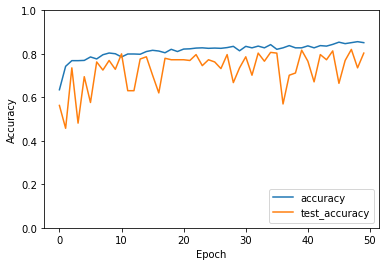

In [28]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [29]:
# 
path = os.getcwd() + '\\specific_data_categorized.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
# Remove features that don't contribute to the classification of the tracks
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       brown
1       brown
2       brown
3       brown
4       brown
        ...  
1172     navy
1173     navy
1174     navy
1175     navy
1176     navy
Name: target, Length: 1177, dtype: object

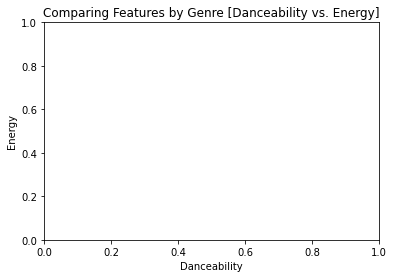

In [30]:
colors = {'indie':'red','rock':'green','pop':'blues','hiphop':'purple',
          'country':'yellow','randb':'orange','latin':'pink','dance':'cyan',
          'folk':'teal','jazz':'brown','classical':'salmon','soul':'navy',
          'punk':'slategrey','metal':'darkgoldenrod','reggae':'darkkhaki'}

'''legend_elements = [Line2D([0], [0], marker='o', color='w', label='Jazz',
                          markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='Rock',
                          markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='Hip-hop',
                          markerfacecolor='b', markersize=15)]'''


fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Danceability vs. Energy]')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')

# How danceable the song is vs the energy/intensity of the song
ax.scatter(data['danceability'], data['energy'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper left')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Valence vs. Acousticness]')
ax.set_xlabel('Valence')
ax.set_ylabel('Acousticness')

# Audience in recording vs use of acoustic instruments
ax.scatter(data['valence'], data['acousticness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper right')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Energy vs. Loudness]')
ax.set_xlabel('Energy')
ax.set_ylabel('Loudness')

# Happiness/valence vs tempo
ax.scatter(data['energy'], data['loudness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='lower right')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Speechiness vs. Instrumentalness]')
ax.set_xlabel('Speechiness')
ax.set_ylabel('Instrumentalness')

# Use of words vs use of instruments
ax.scatter(data['speechiness'], data['instrumentalness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper right')

plt.show()